#                              Artificial Intelligence Final Project

# Multi Linear Regression (MLR) on Carbon dioxide emission of vehicles
    - Due to the existence of more than one feature that influences the accuracy of the model.

# Polynomial Regression on Carbon dioxide emission of vehicles
    - To find more stronger relations between features and build new relations from non-linear features using matrices.

# Table of Contents

- 1. Importing the required packages
- 2. Reading Dataset
- 3. Exploratory Data Analysis
        - 3.1 Preparing the Dataset
            - 3.1.1 Renaming Features
            - 3.1.2 Data Types
            - 3.1.3 Data dimensions
            - 3.1.4 Looking for Missing Values (Null Values)
            - 3.1.5 Looking for Duplicate Data
            - 3.1.6 Removing Duplicate Data
            - 3.1.7 Data After Preparation

        - 3.2 Data Understanding
            - 3.2.1 Summary Statistics
            - 3.2.2 Analyzing Categorical Data
            - 3.2.3 Analyzing all Relationships
            - 3.2.4 Analyzing Relationships Between CO2 Emission and Other Numerical Data With Respect to Fuel Types
            - 3.2.5 Analyzing Relationship Between CO2 Emissions and Fuel Types
            - 3.2.6 Better Visualization Between CO2 Emissions and Engine Size With Respect to Cylinders
   
- 4. Data Preprocessing and Cleaning
        - 4.1 Cleaning Fuel Types
        - 4.2 Cleaning Cylinders
        - 4.3 Cleaning Engine Sizes

- 5. Feature Engineering
        - 5.1 Convert Fuel Type Datatype to Be Used in Model Training.

- 6. Multiple Linear Regression Model
        - 6.1 Model Evaluation
            - 6.1.1 Testing the model
            - 6.1.2 Coefficients of each feature
        - 6.2 Model Performance
        - 6.3 Score Summary
 
- 7. Polynomial Regression Model
        - 7.1 Model Evaluation
            - 7.1.1 Testing the model
            - 7.1.2 Coefficients of each feature
        - 7.2 Model Performance
        - 7.3 Score Summary

# CONTENT  of Dataset
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here.


# Dataset Description:

Here is a brief description of the columns in the dataset:

``Make``: The brand or manufacturer of the vehicle (e.g., Acura, BMW).

``Model``: The specific model of the vehicle (e.g., ILX, MDX, 435i).

``Vehicle Class``: The category or class to which the vehicle belongs (e.g., COMPACT, SUV - SMALL, MID-SIZE).

``Engine Size (L)``: The size of the vehicle's engine in liters.

``Cylinders``: The number of cylinders in the vehicle's engine.

``Transmission``: The type of transmission used in the vehicle (e.g., AS5, M6, AV7, A8).

``Fuel Type``: The type of fuel the vehicle uses (e.g., Z for regular gasoline).

``Fuel Consumption City (L/100 km)``: The fuel consumption in liters per 100 kilometers in city driving conditions.

``Fuel Consumption Hwy (L/100 km)``: The fuel consumption in liters per 100 kilometers in highway driving conditions.

``Fuel Consumption Comb (L/100 km)``: The combined fuel consumption in liters per 100 kilometers (average of city and highway).

``Fuel Consumption Comb (mpg)``: The combined fuel consumption in miles per gallon.

``CO2 Emissions (g/km)``: The amount of carbon dioxide emissions produced by the vehicle in grams per kilometer.

The dataset appears to cover a range of vehicle types and provides information about their fuel efficiency and environmental impact based on CO2 emissions. It can be used for analysis and comparison of different vehicles in terms of their performance and environmental friendliness.

# Model
4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

# Transmission
A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

# Fuel type

X = 0 = Regular gasoline

Z = 1 = Premium gasoline

D = 2 = Diesel

E = 3 = Ethanol (E85)

N = 4 = Natural gas

# Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

# CO2 Emissions (Target Variable)
The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

<br>
<br>

# 1. Importing the required packages

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

<br>
<br>

# 2. Reading Dataset

In [2]:
co2= pd.read_csv('CO2 Emissions_Canada.csv')
co2.head(100)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
95,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
96,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202
97,BMW,528i xDRIVE,MID-SIZE,2.0,4,A8,Z,10.6,7.2,9.1,31,209
98,BMW,535d xDRIVE,MID-SIZE,3.0,6,A8,D,9.2,6.4,7.9,36,213


<br>
<br>

In [3]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377 entries, 0 to 7376
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7377 non-null   object 
 1   Model                             7377 non-null   object 
 2   Vehicle Class                     7377 non-null   object 
 3   Engine Size(L)                    7377 non-null   float64
 4   Cylinders                         7377 non-null   int64  
 5   Transmission                      7377 non-null   object 
 6   Fuel Type                         7377 non-null   object 
 7   Fuel Consumption City (L/100 km)  7377 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7377 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7377 non-null   float64
 10  Fuel Consumption Comb (mpg)       7377 non-null   int64  
 11  CO2 Emissions(g/km)               7377 non-null   int64  
dtypes: flo

<br>
<br>

# 3. Exploratory Data Analysis


# 3.1 Preparing the Dataset

3.1.1 Renaming Features

In [4]:
co2= co2.rename(columns={
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type', 
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'    
})

<br>
<br>

3.1.2 Data Types

In [5]:
co2.dtypes

Make                       object
Model                      object
Vehicle_Class              object
Engine_Size               float64
Cylinders                   int64
Transmission               object
Fuel_Type                  object
Fuel_Consumption_City     float64
Fuel_Consumption_Hwy      float64
Fuel_Consumption_Comb     float64
Fuel_Consumption_Comb1      int64
CO2_Emissions               int64
dtype: object

- Dataset contains 5 object columns, 3 int columns, 4 float columns.

<br>
<br>

3.1.3 Data dimensions

In [6]:
co2.shape

(7377, 12)

- Dataset has 7377 record and 12 features.

<br>
<br>

3.1.4 Looking for Missing Values (Null Values)

In [7]:
mv = co2.isnull().sum()
missing_value = pd.DataFrame({
    'Missing Value': mv,
    'Percentage': (mv / len(co2)) * 100
})
missing_value.sort_values(by = 'Percentage', ascending = False)

,Missing Value,Percentage
Make,0,0.0
Model,0,0.0
Vehicle_Class,0,0.0
Engine_Size,0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel_Type,0,0.0
Fuel_Consumption_City,0,0.0
Fuel_Consumption_Hwy,0,0.0
Fuel_Consumption_Comb,0,0.0


- There are no missing values (Null values) in the dataset.

<br>
<br>

3.1.5 Looking for Duplicate Data

In [8]:
duplicate = co2.duplicated().sum()
print(f'There are {duplicate} duplicated rows in the data')

There are 1097 duplicated rows in the data


<br>
<br>

3.1.6 Removing Duplicate Data

In [9]:
co2.drop_duplicates(inplace=True)
co2.reset_index(inplace=True, drop=True)

<br>
<br>

3.1.7 Data After Preparation

In [10]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    6280 non-null   object 
 1   Model                   6280 non-null   object 
 2   Vehicle_Class           6280 non-null   object 
 3   Engine_Size             6280 non-null   float64
 4   Cylinders               6280 non-null   int64  
 5   Transmission            6280 non-null   object 
 6   Fuel_Type               6280 non-null   object 
 7   Fuel_Consumption_City   6280 non-null   float64
 8   Fuel_Consumption_Hwy    6280 non-null   float64
 9   Fuel_Consumption_Comb   6280 non-null   float64
 10  Fuel_Consumption_Comb1  6280 non-null   int64  
 11  CO2_Emissions           6280 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 588.9+ KB


- There are 6282 records and 12 features without missing values or duplicate data.

<br>
<br>

# 3.2 Data Understanding

3.2.1 Summary Statistics

In [11]:
co2.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
count,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000
mean,3.161943,5.619108,12.610478,9.070844,11.018153,27.410828,251.162739
std,1.365333,1.846425,3.553603,2.279199,2.947304,7.246464,59.299177
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,207.750000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


- The average CO2 emitted from cars is 251 g/km.

- Atleast 4 liters of fuel is consumed by cars on city or highway.

- About 75% of cars use 6 cylinders or less.

- About 75% of cars don't have engine size greater than 4.

- The amount of fuel consumed by cars on city roads are greater than on highway roads.

<br>
<br>

In [12]:
co2.nunique()

Make                        42
Model                     2052
Vehicle_Class               16
Engine_Size                 51
Cylinders                    8
Transmission                27
Fuel_Type                    5
Fuel_Consumption_City      211
Fuel_Consumption_Hwy       143
Fuel_Consumption_Comb      181
Fuel_Consumption_Comb1      54
CO2_Emissions              331
dtype: int64

- There are 42 different car companies along with 2053 different car models.

- Vehicles are divided into 16 classes.

- There are 5 different fuel types used by cars.

<br>
<br>

In [13]:
co2.describe(include = "object")

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6280,6280,6280,6280,6280
unique,42,2052,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1137,3038


- Most of the cars use AS6 Transmission.

- SUV-Small vehicles are the most frequent.

- Fuel type X is the most used by cars.

- Ford is the most frequent car on road.

<br>
<br>

3.2.2 Analyzing Categorical Data

In [14]:
make_cnt = co2["Make"].value_counts().sort_values(ascending=False).head(10)
model_cnt = co2["Model"].value_counts().sort_values(ascending=False).head(10)
class_cnt = co2["Vehicle_Class"].value_counts().sort_values(ascending=False).head(10)
trans_cnt = co2["Transmission"].value_counts().sort_values(ascending=False).head(10)
fuel_cnt = co2["Fuel_Type"].value_counts().sort_values(ascending=False).head()

- Sort count values of Make, Model, Vehicle Class, Transmission and Fuel Type to analyze the top frequent of each.

<br>
<br>

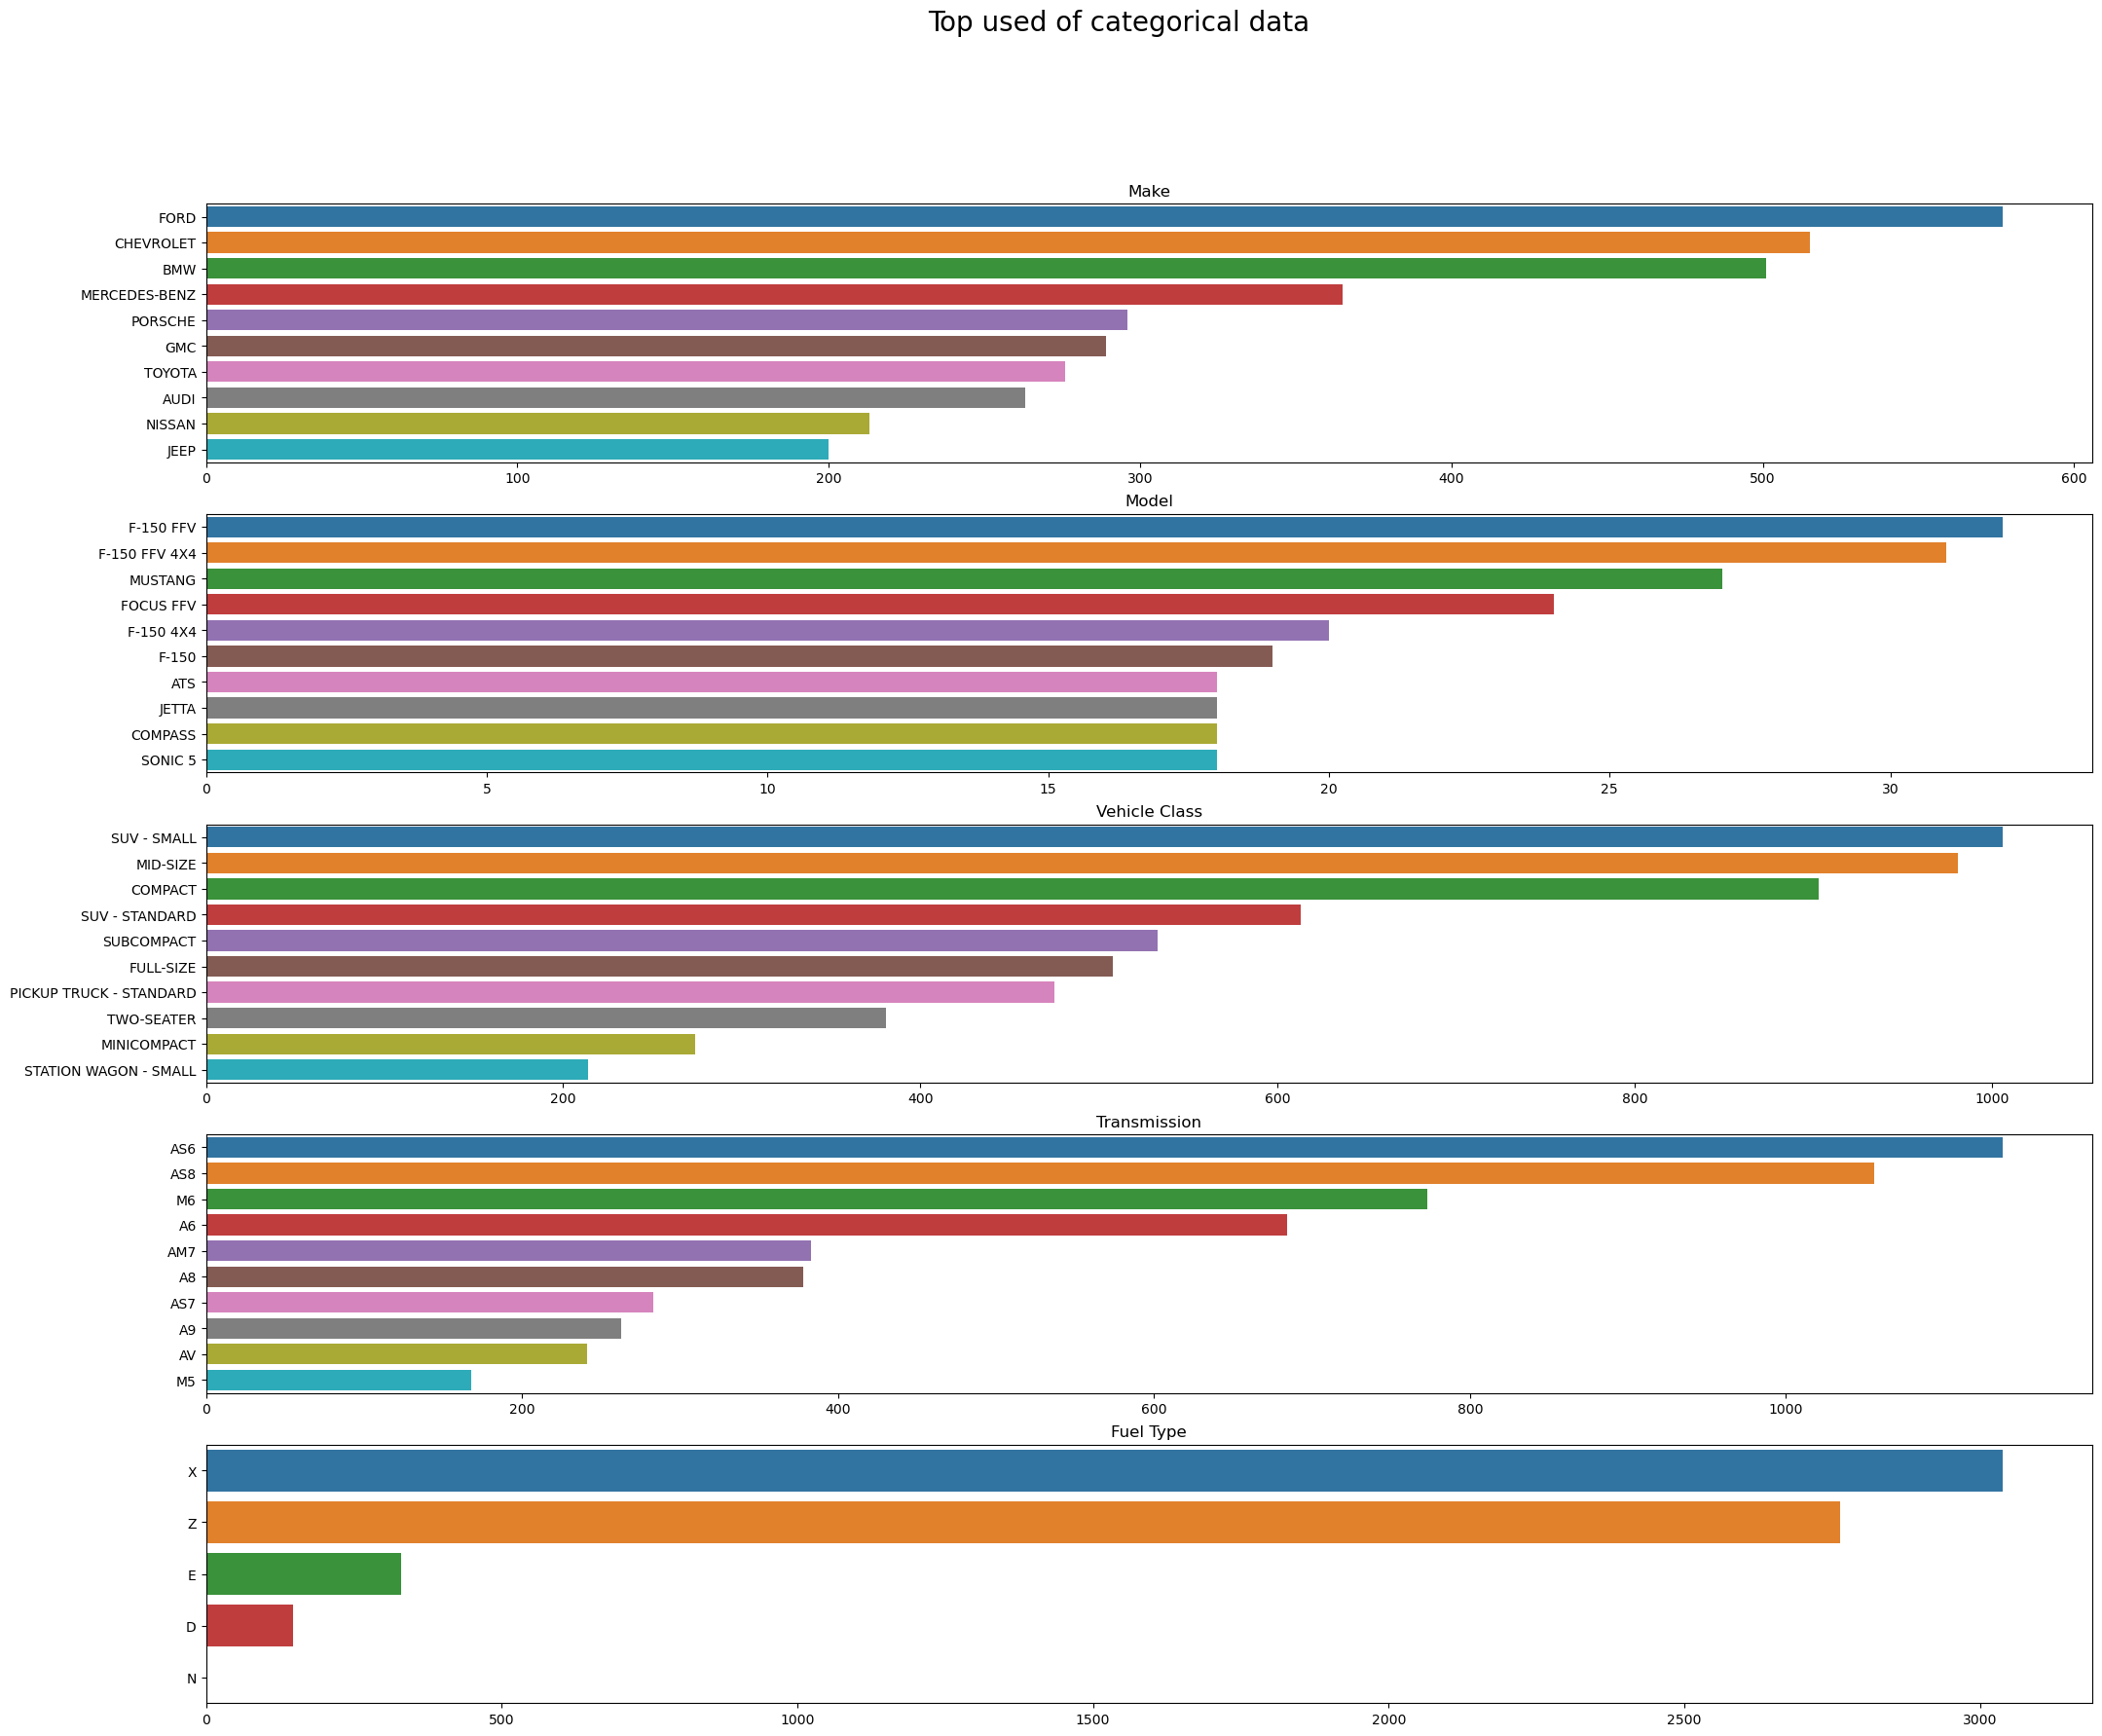

In [15]:
fig, axes = plt.subplots(5, 1, figsize=(25, 20))
fig.suptitle('Top used of categorical data', size=20)

sns.barplot(ax=axes[0],x = make_cnt.values,y = make_cnt.index)
axes[0].set_title('Make')

sns.barplot(ax=axes[1],x = model_cnt.values,y = model_cnt.index)
axes[1].set_title('Model')

sns.barplot(ax=axes[2],x = class_cnt.values,y = class_cnt.index)
axes[2].set_title('Vehicle Class')

sns.barplot(ax=axes[3], x=trans_cnt.values,y=trans_cnt.index)
axes[3].set_title('Transmission')

sns.barplot(ax=axes[4], x=fuel_cnt.values,y=fuel_cnt.index)
axes[4].set_title('Fuel Type')

plt.show()

- Ford is the most frequent car on road.

- F-150 FFV is the most frequent car model.

- SUV-Small is the most frequent vehice class.

- Most cars prefer to use AS6 and AS8 transmissions.

- Most of the cars use X and Z fuel types while N fuel type is barely used.

<br>
<br>

In [16]:
make_co2 = co2.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = co2.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
class_co2 = co2.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = co2.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = co2.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

- Sort mean values of Make, Model, Vehicle Class, Fuel Type and group them with CO2 Emissions to analyze the top emitting of CO2.

<br>
<br>

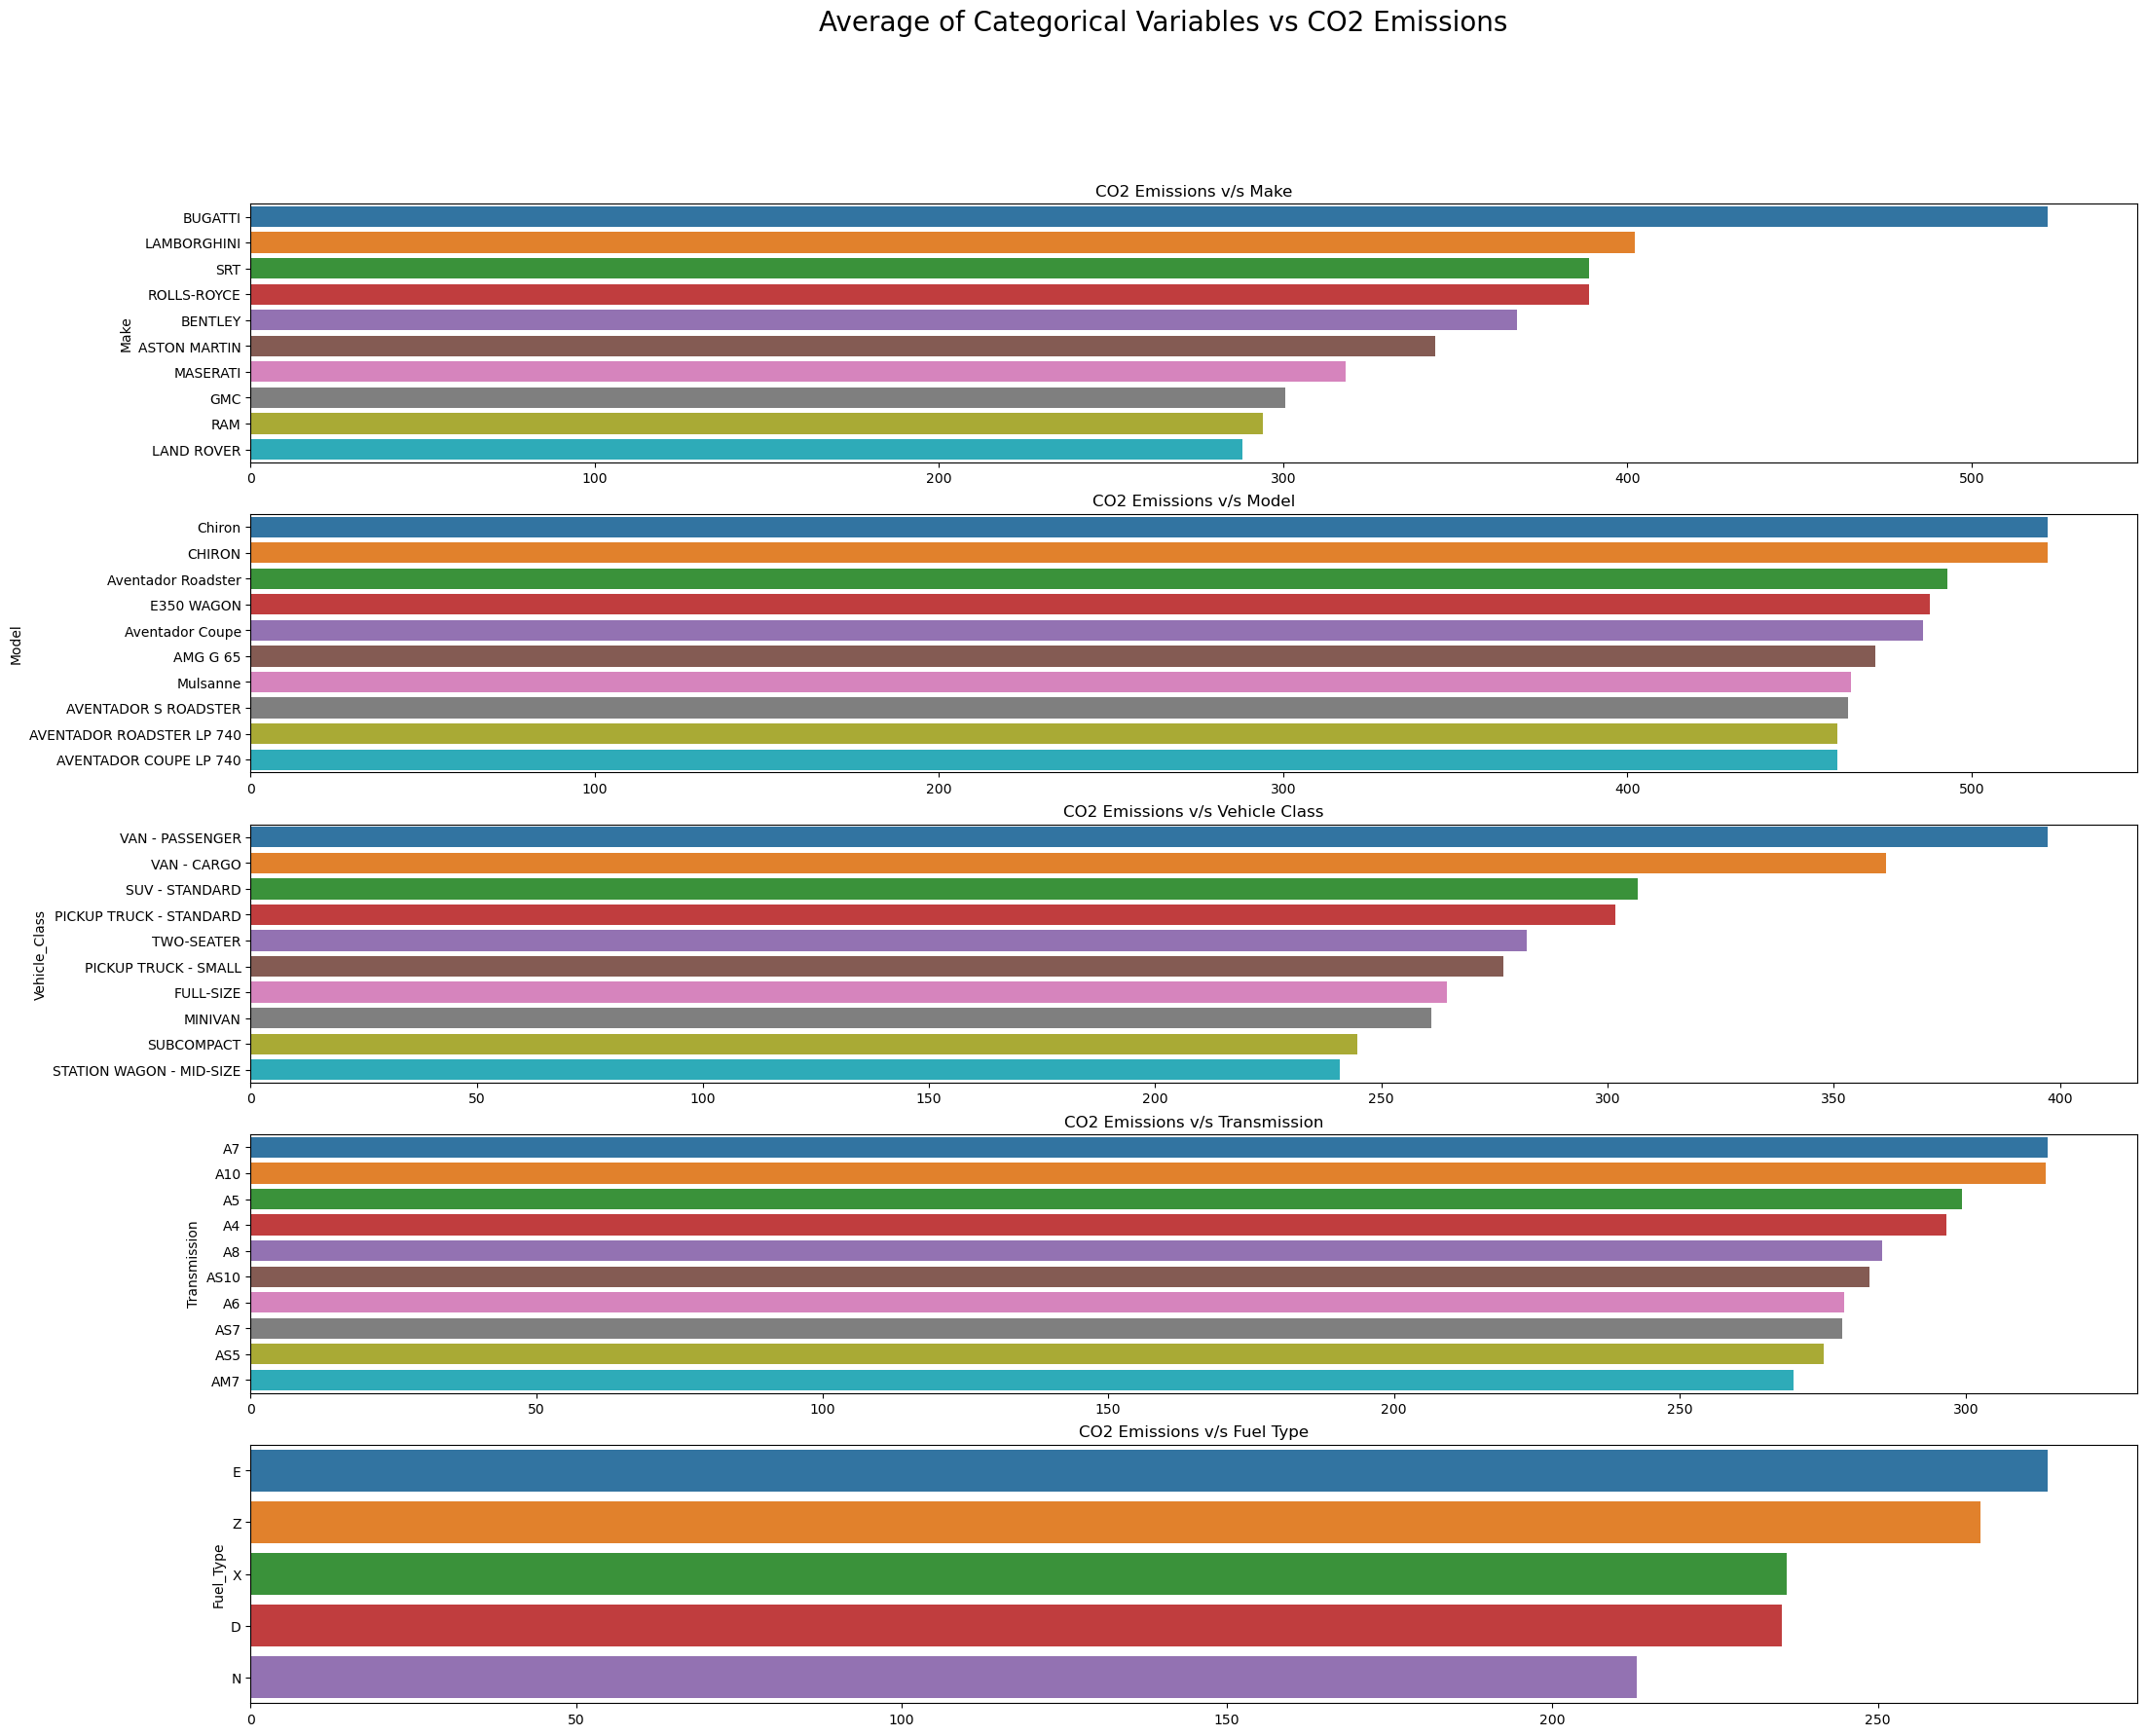

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(25, 20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0],x = make_co2.values,y = make_co2.index)
axes[0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[1],x = model_co2.values,y = model_co2.index)
axes[1].set_title('CO2 Emissions v/s Model')

sns.barplot(ax=axes[2],x = class_co2.values,y = class_co2.index)
axes[2].set_title('CO2 Emissions v/s Vehicle Class')

sns.barplot(ax=axes[3], x=transmission_co2.values,y=transmission_co2.index)
axes[3].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[4], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[4].set_title('CO2 Emissions v/s Fuel Type')

plt.show()

- Bugatti emits the most amount of CO2.

- Bugatti Chiron emits the most amount of CO2.

- Large Cars / Trucks emit the most amount of CO2.

- Cars with ethanol fuel type emit the most amount of CO2.

- Cars with transmission A10 emits the most amount of CO2.

- Overall, cars with the most CO2 emissions are not frequently used but only fuel type is frequent.

<br>
<br>

3.2.3 Analyzing all Relationships

<Figure size 1000x500 with 0 Axes>

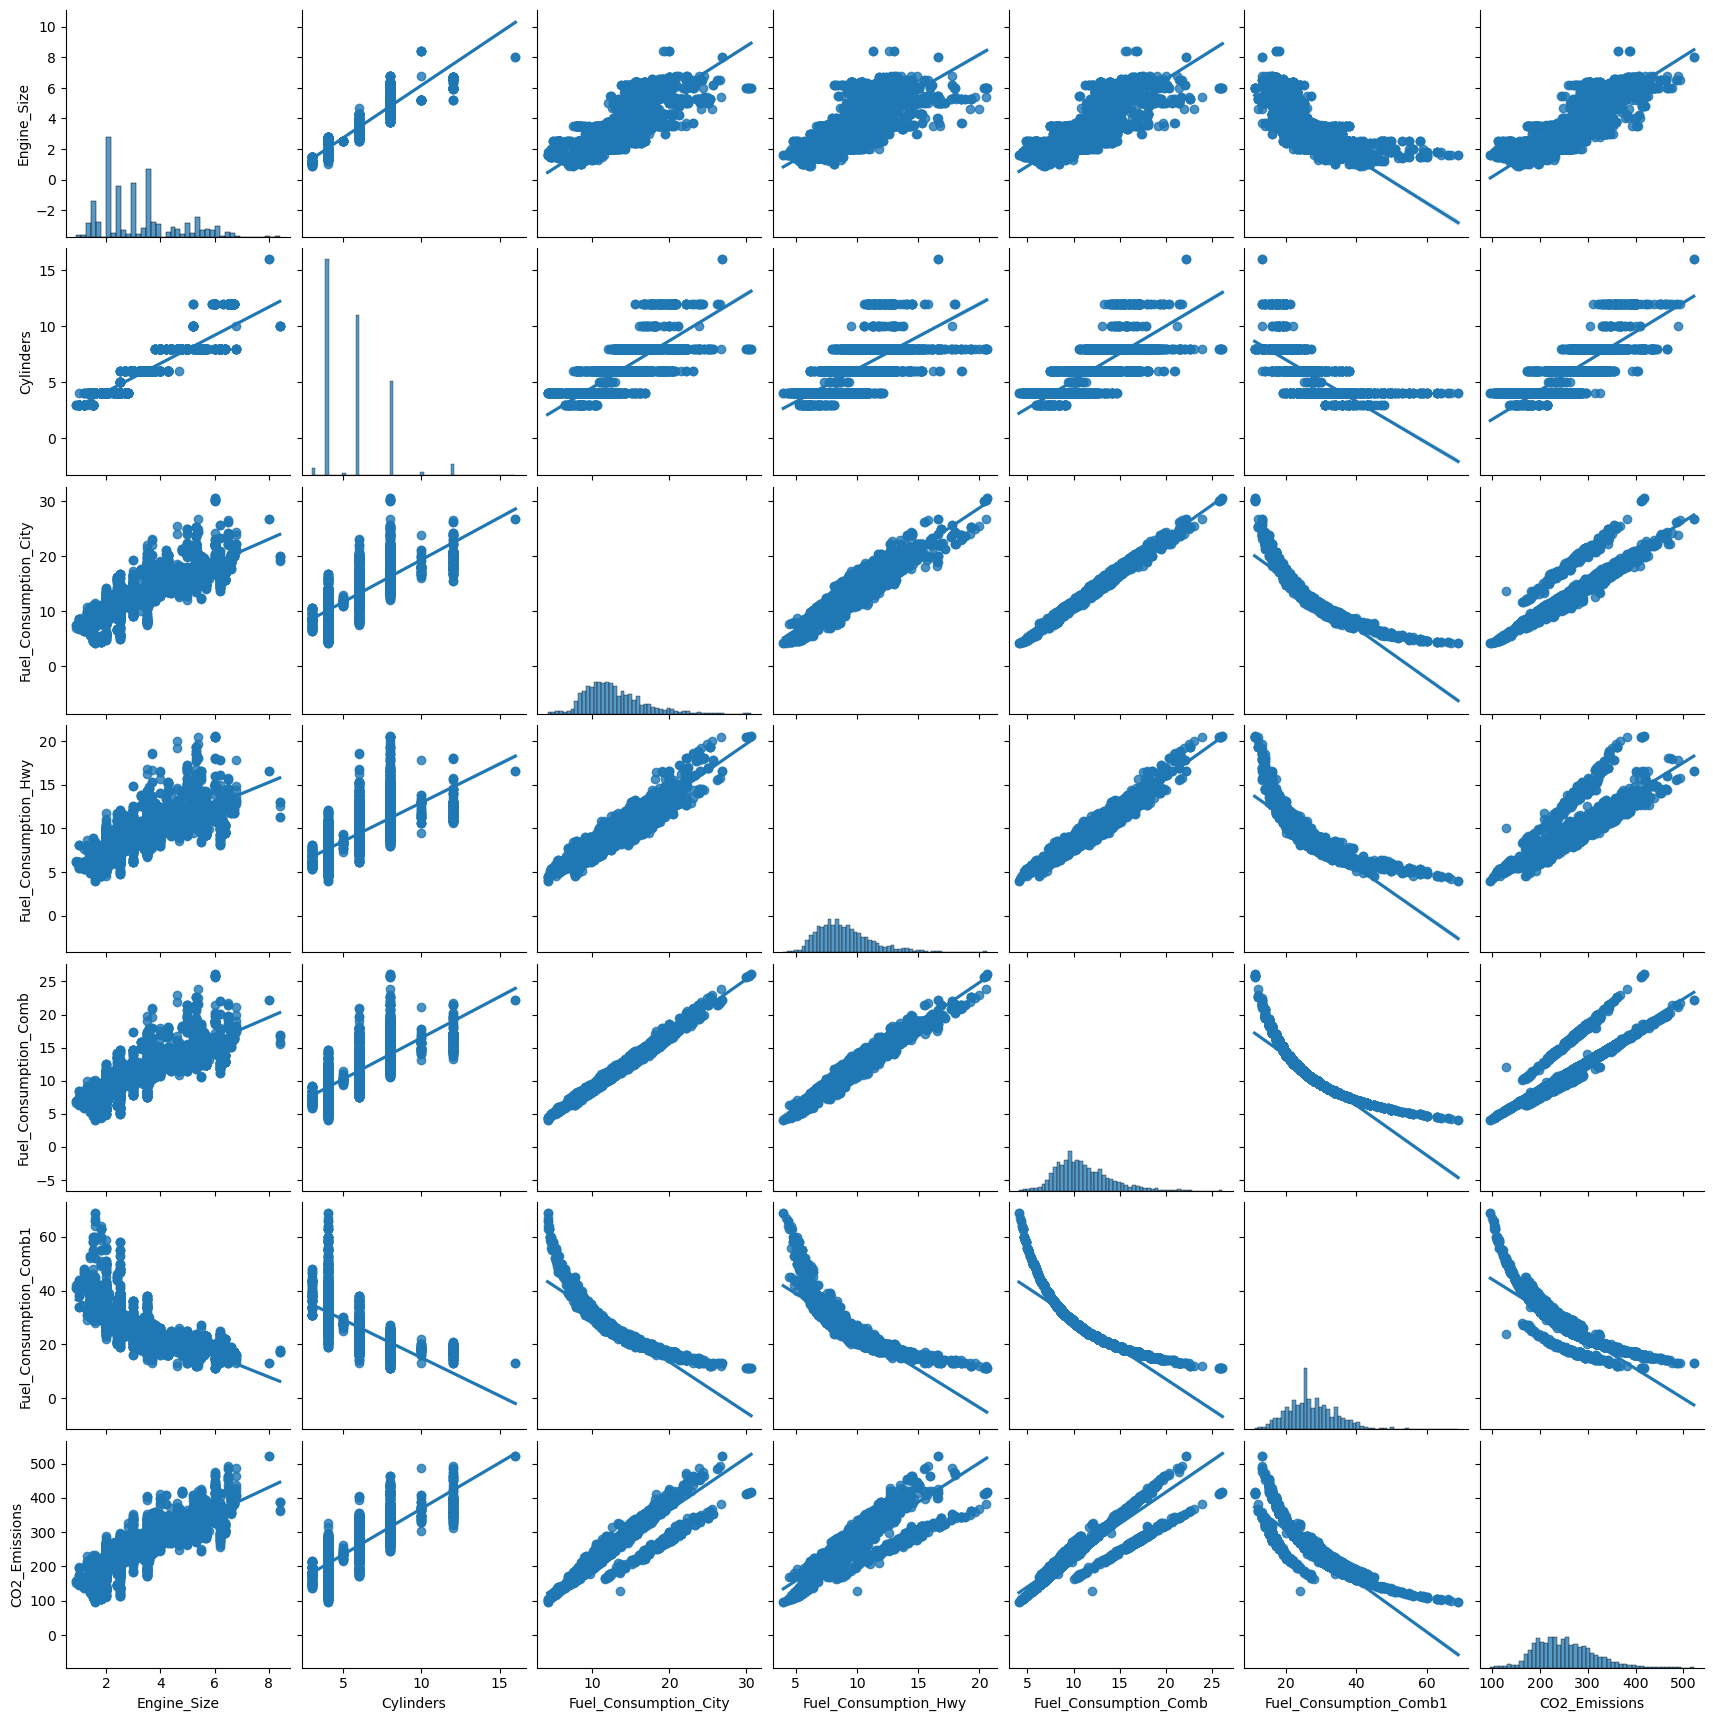

In [18]:
plt.figure(figsize=(10,5))
sns.pairplot(co2,kind="reg")
plt.show()

- Engine_Size, Cylinders, Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related and directly proportional with CO2 Emissions.

- Fuel_Consumption_Comb1 has a negative relation with every other feature.

    - 2.35215 / (1 mpg) = 2.352 L/km
    
    - Because L/km is positively related with every other feature. Increasing mpg decreases L/km resulting in negative relation with other features.

    - Fuel efficiency is expressed in miles per gallon (mpg) and that is the opposite of fuel consumption (Saving Fuel).

    - Fuel consumption City and Hwy is a more accurate measure of a vehicle's performance because it is a linear relationship while fuel efficiency is a more accurate measure in efficiency improvements (e.g. CO2 Emissions).

    - So using Fuel_Consumption_Comb1 (mpg) with Fuel_Consumption_City (L/km) and Fuel_Consumption_Hwy (L/km) is more accurate than using Fuel_Consumption_Comb only as it is a good measure for a vehicle's performance.

- Fuel Consumption Comb is the average of Fuel Consumption City and Highway.

    - Using them separately may be more accurate. Driving in city may result in higher fuel consumption and CO2 emissions due to frequent stops and starts.

<br>
<br>


3.2.4 Analyzing Relationships Between CO2 Emission and Other Numerical Data With Respect to Fuel Types

C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_13440\1127938484.py:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[0],x = "Engine_Size",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_13440\1127938484.py:5: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[1],x = "Cylinders",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_13440\1127938484.py:6: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[2],x = "Fuel_Consumption_City",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_13440\1127938484.py:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(ax=axes[3],x = "Fuel_Consumption_Hwy",y = "CO2_Emissions", data = c

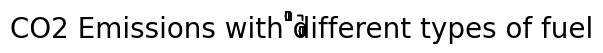

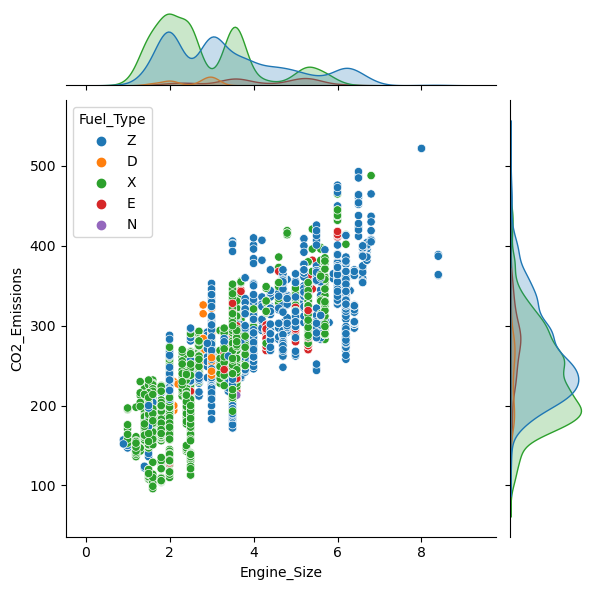

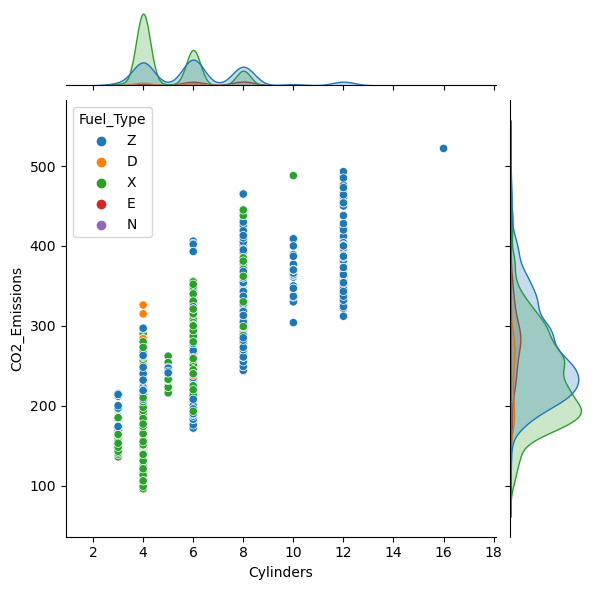

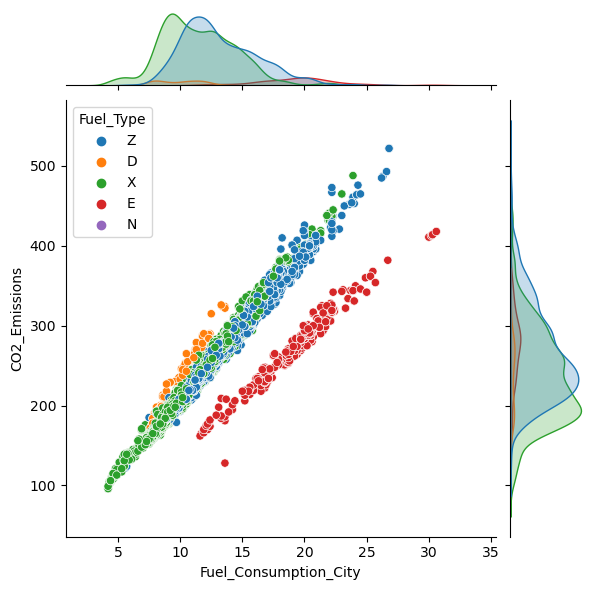

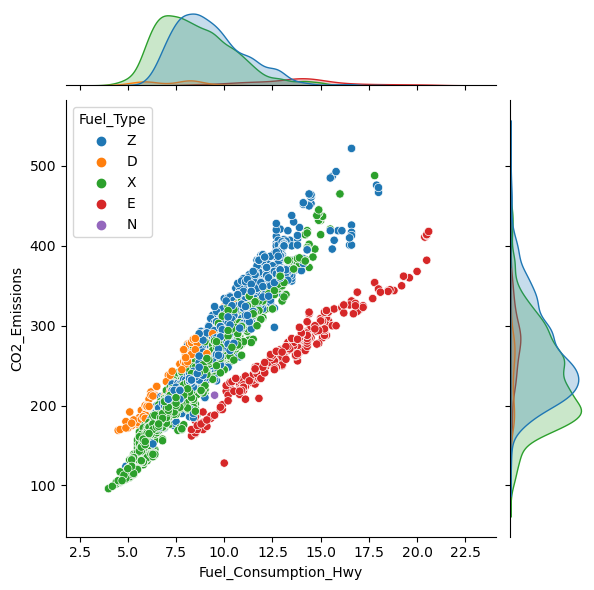

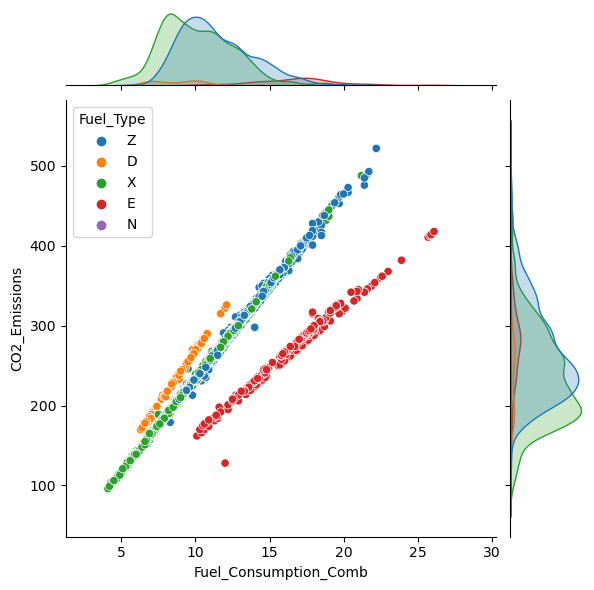

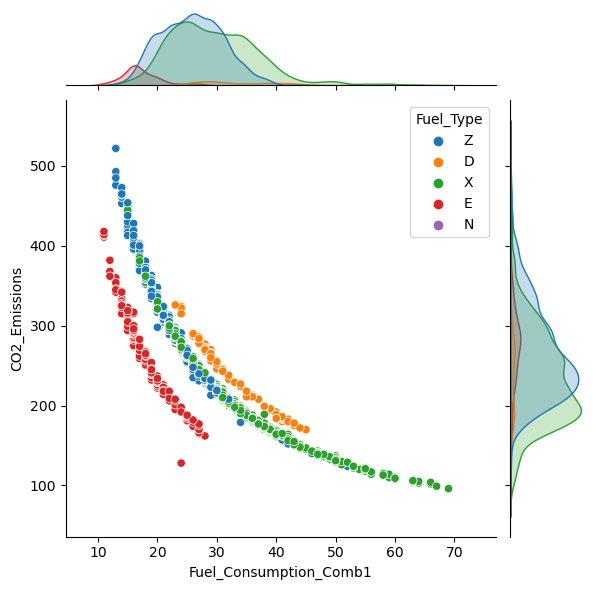

In [19]:
fig, axes = plt.subplots(1, 6, figsize=(0, 0))
fig.suptitle('CO2 Emissions with different types of fuel', size=20)

sns.jointplot(ax=axes[0],x = "Engine_Size",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
sns.jointplot(ax=axes[1],x = "Cylinders",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
sns.jointplot(ax=axes[2],x = "Fuel_Consumption_City",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
sns.jointplot(ax=axes[3],x = "Fuel_Consumption_Hwy",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
sns.jointplot(ax=axes[4],x = "Fuel_Consumption_Comb",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")
sns.jointplot(ax=axes[5],x = "Fuel_Consumption_Comb1",y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Fuel_Type")

plt.show()

- Engine Size, Cylinders, Fuel Consumption City, Fuel Consumption Hwy, Fuel Consumption Comb1 with the same values have different fuel types.

    - Fuel types affects other features so it also affects CO2 emissions.

- Cylinders with value 10 don't have enough data in the range of 500 CO2 Emissions. (Only 1 with large gap)

- Cylinders with value 13 and more don't have enough data.

- Engine Sizes with value 7 or more don't have enough data.

<br>
<br>

3.2.5 Analyzing relationship between CO2 Emissions and Fuel Types

<Axes: ylabel='Fuel_Type'>

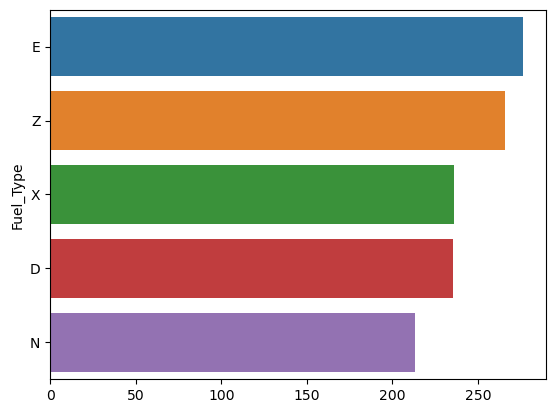

In [20]:
fuel_type_co2 = co2.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()
sns.barplot(x=fuel_type_co2.values,y=fuel_type_co2.index, data = co2)

- Here, we can see that Ethanol emits the most amount of CO2.

- Different fuel types have different amounts of CO2 Emissions (E > Z > D > X > N).

<br>
<br>

3.2.6 Better Visualization Between CO2 Emissions and Engine Size With Respect to Cylinders

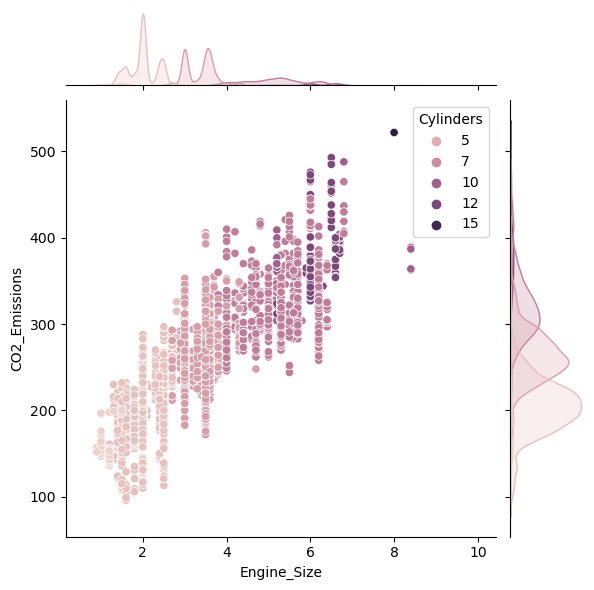

In [21]:
sns.jointplot(x = "Engine_Size", y = "CO2_Emissions", data = co2, kind = "scatter", hue = "Cylinders")

- Here, we have a better visualization of the relation between engine size, cylinders and their effect on CO2 Emission combined.

    - The larger the engine size is the more cylinders it will need so increasing engine size increases amount of cylinders.

    - Cylinders with engine size have a better and more accurate visualization for their relation with CO2 Emissions.
 
- We can also see that not many cars use engine size >= 7 and cylinders >= 13

<br>
<br>

# 4. Data Preprocessing and Cleaning

- 4.1 Cleaning Fuel Types

In [22]:
co2 = co2[co2["Fuel_Type"] != "N"]
co2 = co2.reset_index(drop=True)

- As seen and analyzed in 3.2.2 plot, N Fuel Type is barely used and there isn't much data about it to use in model training thus using it would increase error percentage.

<br>
<br>

- Fuel Types after cleaning.

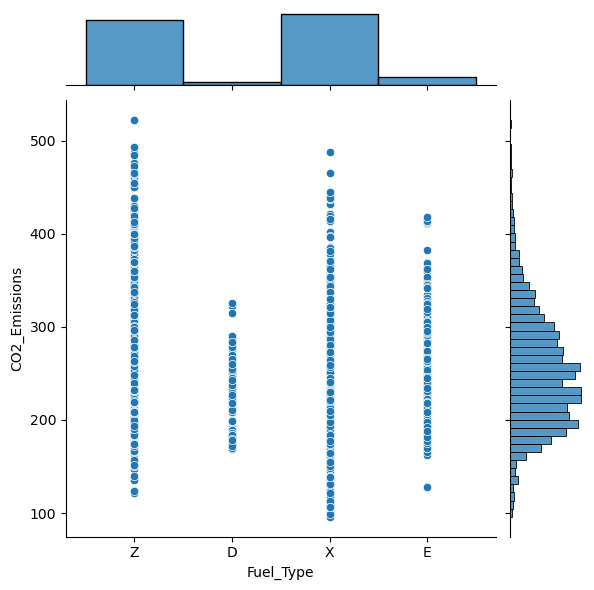

In [23]:
sns.jointplot(x = "Fuel_Type", y = "CO2_Emissions", data = co2, kind = "scatter")

<br>
<br>

- 4.2 Cleaning Cylinders

In [24]:
co2 = co2[co2["Cylinders"] < 13]
co2 = co2[~((co2.Cylinders == 10) & (co2.CO2_Emissions > 450))]
co2 = co2.reset_index(drop=True)

- As seen in 3.2.4 Cylinders and CO2 Emissions plot, 13 or more Cylinders are barely used and there is a large gap between data of cylinders equal to 10 with less than 450 and more than 450 CO2 Emissions and there isn't much data about it to use in model training thus using it would increase error percentage.

<br>
<br>

- Cylinders after Cleaning

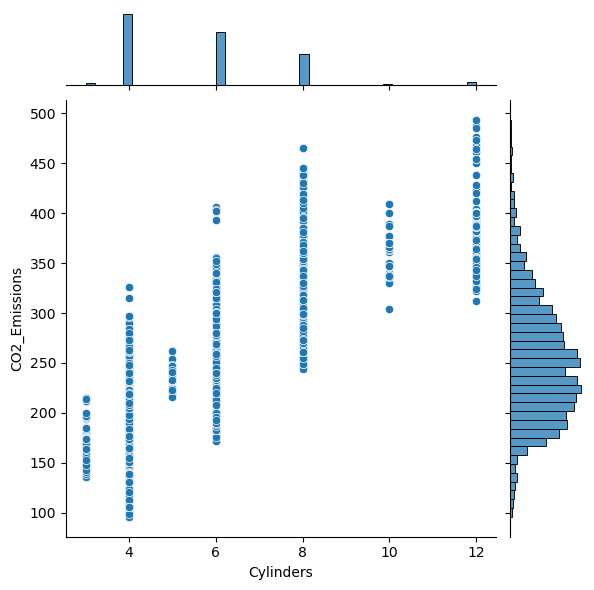

In [25]:
sns.jointplot(x = "Cylinders",y = "CO2_Emissions", data = co2, kind = "scatter")

<br>
<br>

- 4.3 Cleaning Engine Size

In [26]:
co2 = co2[co2["Engine_Size"] < 7]
co2 = co2.reset_index(drop=True)

- As seen in 3.2.4 Engine Size and CO2 Emissions plot, Engine Sizes with value 7 or more are barely used and there isn't much data about it to use in model training thus using it would increase error percentage.

<br>
<br>

- Engine Size after Cleaning

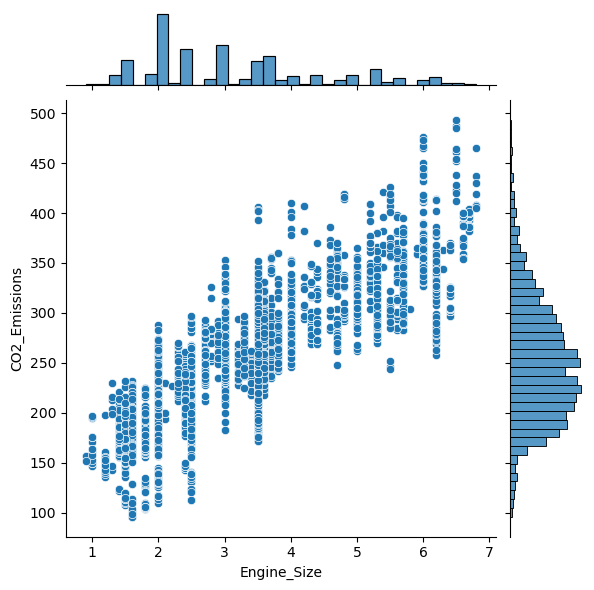

In [27]:
sns.jointplot(x = "Engine_Size",y = "CO2_Emissions", data = co2, kind = "scatter")

<br>
<br>

# 5. Feature Engineering

5.1 Convert Fuel Type Datatype to Be Used in Model Training.

In [28]:
co2["Fuel_Type"].tail(10)

6261    Z
6262    Z
6263    Z
6264    Z
6265    X
6266    Z
6267    Z
6268    Z
6269    Z
6270    Z
Name: Fuel_Type, dtype: object

- Fuel Types before datatype conversion.

<br>
<br>

In [29]:
Fuel_T = []

for val in co2["Fuel_Type"]:
    if (val == 'X'):
        Fuel_T.append(0)
    elif (val == 'Z'):
        Fuel_T.append(1)
    elif (val == 'D'):
        Fuel_T.append(2)
    else:
        Fuel_T.append(3)

co2["Fuel_Type"] = Fuel_T

<br>
<br>

In [30]:
co2["Fuel_Type"].tail(10)

6261    1
6262    1
6263    1
6264    1
6265    0
6266    1
6267    1
6268    1
6269    1
6270    1
Name: Fuel_Type, dtype: int64

- Fuel types after datatype conversion.

<br>
<br>

# 6. Multiple Linear Regression Model

# ``Y = M1X1 + M2X2 + .. + MnXn + C``

In [57]:
features = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb1', 'Fuel_Type']
X = co2[features]
y = co2['CO2_Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Split train and test samples by ratio 70% for train and 30% for test due to small amount of data.

<br>
<br>

In [58]:
MLRmodel = LinearRegression()
MLRmodel.fit(X_train, y_train)

LinearRegression()

- Fitting data into linear regression to start training the model.

<br>
<br>

# 6.1 Model Evaluation

- 6.1.1 Testing the model

In [59]:
y_pred = MLRmodel.predict(X_test)

<br>
<br>

- 6.1.2 Coefficients of each feature

In [60]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': MLRmodel.coef_})
print(coefficients)

                  Feature  Coefficient
0             Engine_Size     1.539727
1               Cylinders     7.290948
2   Fuel_Consumption_City     5.156953
3    Fuel_Consumption_Hwy     4.414351
4  Fuel_Consumption_Comb1    -2.855411
5               Fuel_Type   -14.863916


<br>
<br>

# 6.2 Model Performance

In [61]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 238.43279477003387


<br>
<br>

In [62]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 11.376119209465772


<br>
<br>

In [63]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9303324373950307


- Indicates the goodness of fitting

<br>
<br>

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 15.44126920852149


<br>
<br>

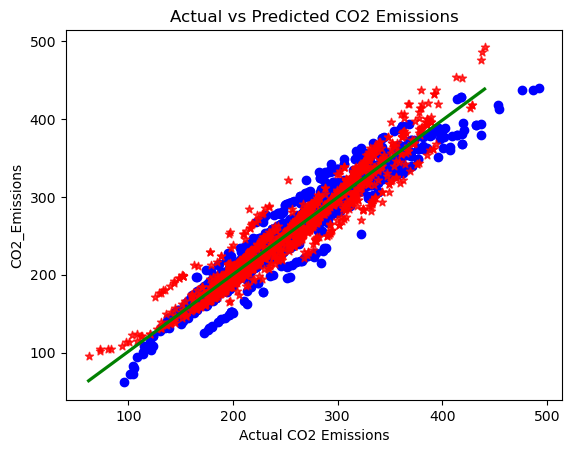

In [65]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
sns.regplot(y=y_test, x=y_pred, color='red', line_kws={'color':'green'}, marker='*')
plt.show()

<br>
<br>

# 6.3 Score Summary

In [66]:
MLRmodel.score(X_train, y_train)

0.927433044967522

In [67]:
MLRmodel.score(X_test, y_test)

0.9303324373950307

<br>
<br>

# 7. Polynomial Regression Model

# `` Y = b0 + b1X1 + b2X2 + b3(X1)^2 + b4(X2)^2 + b5X1X2 + .. + etc ``

In [68]:
features = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb1', 'Fuel_Type']
X = co2[features]
y = co2['CO2_Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<br>
<br>

In [69]:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

<br>
<br>

In [70]:
Pmodel = LinearRegression()
Pmodel.fit(X_train_poly, y_train)

LinearRegression()

<br>
<br>

# 7.1 Model Evaluation

- 7.1.1 Testing the model

In [71]:
y_pred = Pmodel.predict(X_test_poly)

<br>
<br>

- 7.1.2 Coefficients of each feature

In [72]:
print("Coefficients:\n", Pmodel.coef_, "\n")
print("Intercept:", Pmodel.intercept_)

Coefficients:
 [ 8.58243561e-10 -8.90680730e+01  1.94452445e+02 -4.24035125e+01
 -3.80983984e+01 -1.83398911e+01  6.92786589e+01  6.23877874e+00
 -1.63463343e+01  4.98674182e+00  6.01900100e+00  3.59886755e+00
 -5.97631976e+00  2.61320136e+00 -7.80261235e+00 -3.93770049e+00
 -7.94315621e+00 -6.02840613e+00  2.66932008e+00  3.54869930e-01
  1.94348113e+00 -8.39635066e+00  2.88894224e+00  1.64143847e+00
 -9.39595521e+00  3.98636434e-01 -7.15525869e+00  1.67706826e+02
  6.58005505e-01 -3.04810516e-01 -5.81453856e-01 -2.24854440e-02
 -1.18657042e-01 -1.14582638e+00 -1.36635794e-01  6.10718082e-01
  3.22746004e-01  3.20675436e-01  1.41522128e+00 -6.01148671e-02
  4.83638385e-02 -1.09453126e-01  2.70278583e-01 -2.85349963e-01
 -1.15268181e-01 -1.54257014e-01 -3.55365917e-02  1.03028924e-01
  5.89863038e-01  2.53118905e-02 -6.54605946e-02  4.47225165e-02
 -5.20974951e-02 -8.25035227e-01  1.58303767e-01 -3.87155542e-01
  1.95501493e-01  3.90296532e-01  3.12199031e-01  4.61967061e-02
  3.481783

<br>
<br>

# 7.2 Model Performance

In [73]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.921750167063384


<br>
<br>

In [74]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.2163478820384634


<br>
<br>

In [75]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9976853476626942


<br>
<br>

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 2.814560386110659


<br>
<br>

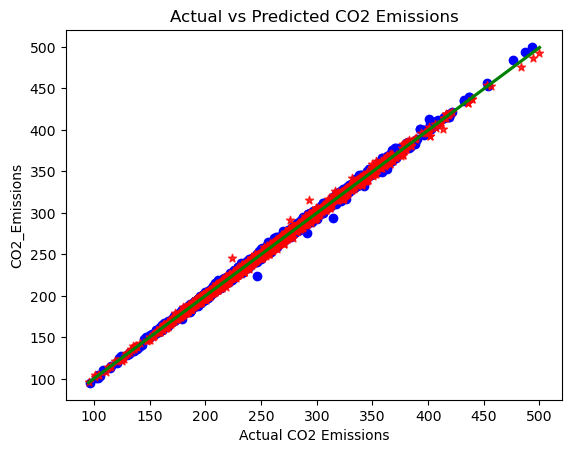

In [77]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')

sns.regplot(y=y_test, x=y_pred, color='red', line_kws={'color':'green'}, marker='*')

plt.show()

<br>
<br>

- Testing the model using external data.

In [78]:
poly = PolynomialFeatures(degree=3)
#features = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb1', 'Fuel_Type']
#X_predict_poly = poly.fit_transform([[3.5, 6, 11.9, 7.7, 28, 1]])
X_predict_poly = poly.fit_transform([[3.5, 6, 11.9, 7.7, 28, 1]])
X_predict_poly_df = pd.DataFrame(X_predict_poly)
print(f"Predicted CO2 Emission: {Pmodel.predict(X_predict_poly_df)} g/km")

Predicted CO2 Emission: [232.79664729] g/km


<br>
<br>

# 7.3 Score Summary

In [79]:
Pmodel.score(X_train_poly, y_train)

0.9975144521713274

In [80]:
Pmodel.score(X_test_poly, y_test)

0.9976853476626942

<br>
<br>

In [58]:
import pickle 
with open('co2_MLRmodel','wb') as file: 
    pickle.dump(MLRmodel,file)

In [59]:
with open('co2_Pmodel','wb') as file: 
    pickle.dump(Pmodel,file)

In [ ]:
import pickle 
with open('co2_MLRmodel','rb') as file:
    ourModel1 = pickle.load(file)
    ourModel1.predict([])

In [ ]:
with open('co2_Pmodel','rb') as file:
    ourModel2 = pickle.load(file)
    ourModel2.predict([])